# Prodigy InfoTech Internship

## PRODIGY_DS_02

## Task-02
Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, 
such as the Titanic dataset from Kaggle. 
Explore the relationships between variables and identify patterns and trends in the data.

## IMDB Dataset of top 1000 movies and tv shows.

### Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

### Loading Dataset

In [2]:
data = pd.read_csv('imdb_top_1000.csv')
data.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### Shape of the data

In [3]:
print("The shape of the dataset is: {} rows and {} columns".format(data.shape[0], data.shape[1]))

The shape of the dataset is: 1000 rows and 16 columns


### Info of the data

In [4]:
data.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


### Finding number of missing values in each column

In [6]:
missing_values = data.isna().sum().reset_index()
missing_values.columns = ['columns','missing_counts']
missing_values

,columns,missing_counts
0,Poster_Link,0
1,Series_Title,0
2,Released_Year,0
3,Certificate,101
4,Runtime,0
5,Genre,0
6,IMDB_Rating,0
7,Overview,0
8,Meta_score,157
9,Director,0


In [7]:
data['Certificate'].fillna('U',inplace=True)

In [8]:
data['Meta_score'].fillna(data['Meta_score'].mean(),inplace=True)

In [9]:
print(data['Gross'].head(1))
data['Gross'] = data['Gross'].str.replace(',', '')
print(data['Gross'].head(1))

data['Gross'] = data['Gross'].astype('float64')
data['Gross'] = data['Gross'].replace(np.nan, 0)

0    28,341,469
Name: Gross, dtype: object
0    28341469
Name: Gross, dtype: object


In [10]:
data['Gross'] = data['Gross'].astype(int)

In [11]:
data['Gross'].dtype

dtype('int32')

In [12]:
data = data.rename(columns={"Series_Title": "Movies_Title"})

In [13]:
data.head(3)

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Movies_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   int32  
dtypes: float64(2), int32(1), int64(1), object(12)
memory usage: 121.2+ KB


In [15]:
missing_values = data.isna().sum().reset_index()
missing_values.columns = ['columns','missing_counts']
missing_values

,columns,missing_counts
0,Poster_Link,0
1,Movies_Title,0
2,Released_Year,0
3,Certificate,0
4,Runtime,0
5,Genre,0
6,IMDB_Rating,0
7,Overview,0
8,Meta_score,0
9,Director,0


### Finding correlation


In [16]:
data.corr()

C:\Users\hasanein\AppData\Local\Temp\ipykernel_13436\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,IMDB_Rating,Meta_score,No_of_Votes,Gross
IMDB_Rating,1.000000,0.253903,0.494979,0.082381
Meta_score,0.253903,1.000000,-0.017739,-0.052221
No_of_Votes,0.494979,-0.017739,1.000000,0.602128
Gross,0.082381,-0.052221,0.602128,1.000000


### Exploratory Data Analysis and Visualization

In [17]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Getting Idea about all columns using graphs

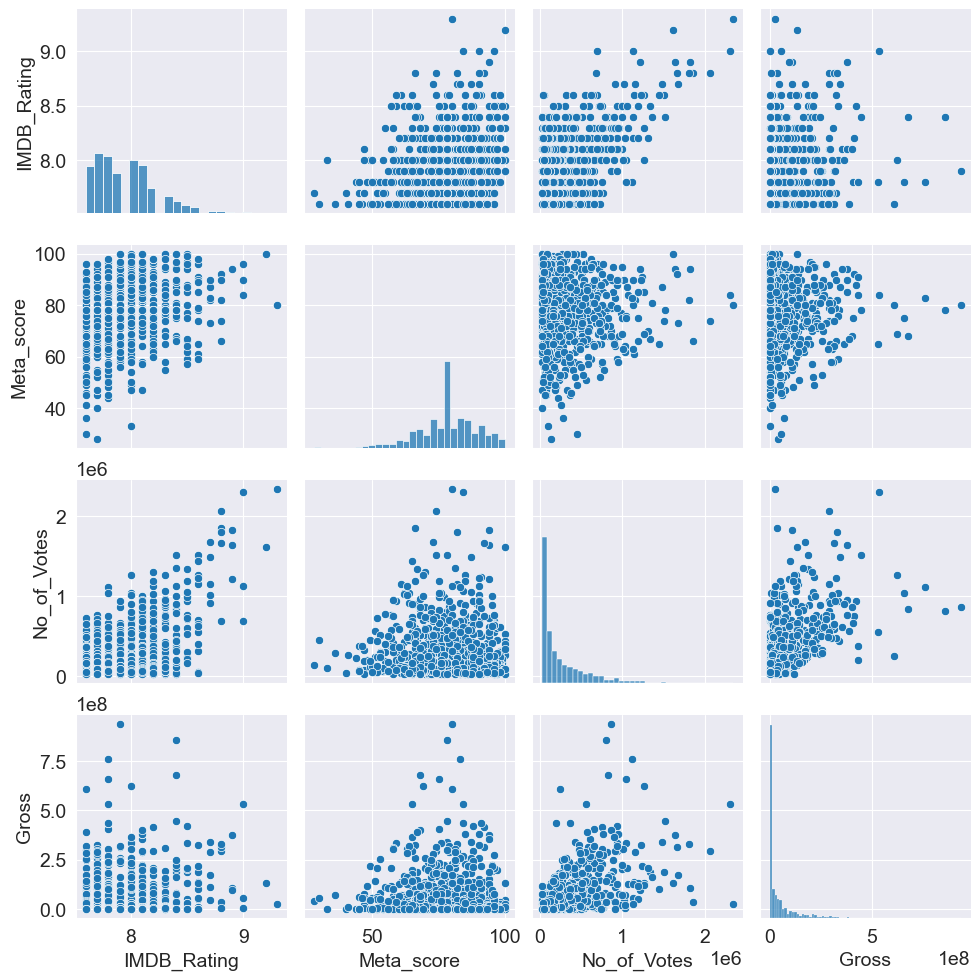

In [18]:
sns.pairplot(data)

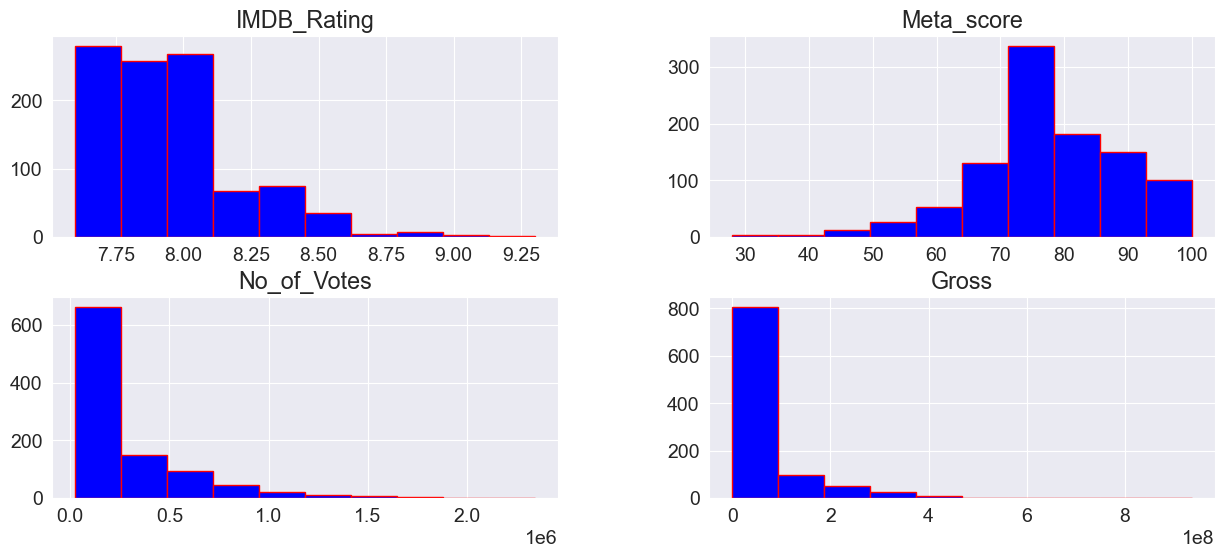

In [19]:
numerical_attributes = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']
data[numerical_attributes].hist(figsize = (15, 6), color = 'blue', edgecolor = 'red', layout = (2, 2));

In [20]:
data.describe(include = ['O'])

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,999,100,16,140,202,1000,548,660,841,891,939
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,Two imprisoned men bond over a number of years...,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine
freq,1,2,32,335,23,85,1,14,12,7,5,4


Text(0, 0.5, 'Meta Score')

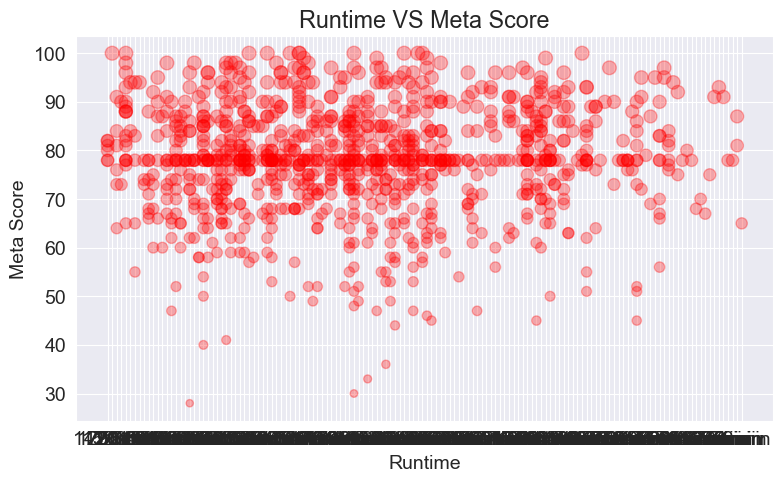

In [21]:
plt.scatter(data['Runtime'],data['Meta_score'],color='red',s=data['Meta_score'],alpha=0.3)
plt.title('Runtime VS Meta Score')
plt.xlabel('Runtime')
plt.ylabel('Meta Score')

In [22]:
top_voted = data.sort_values(['No_of_Votes'], ascending = False)

### Top voted movies

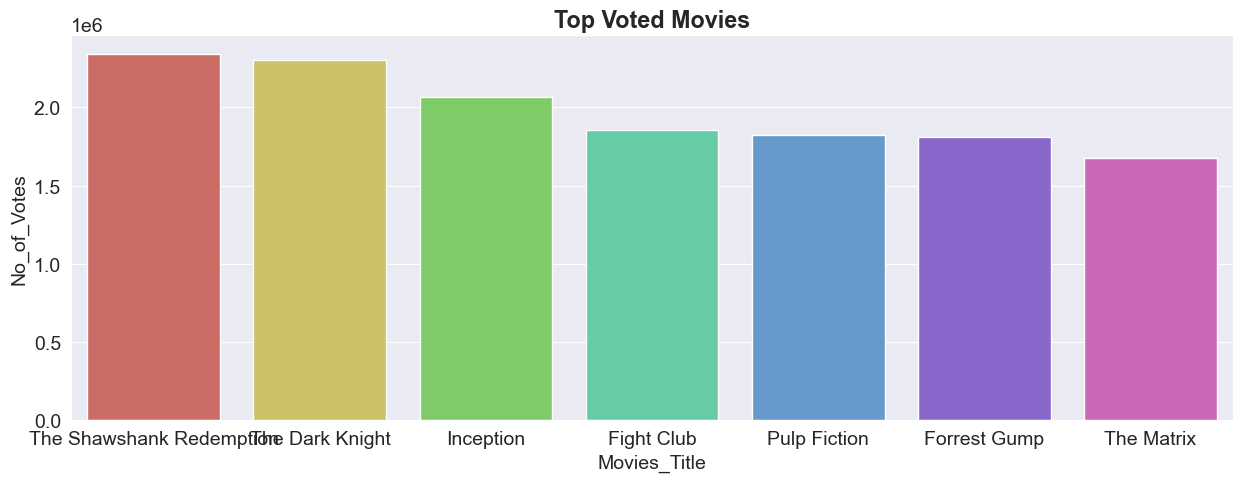

In [23]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['No_of_Votes'][:7], palette = 'hls')
g.set_title("Top Voted Movies", weight = "bold")
plt.show()

### Top voted movies metascores

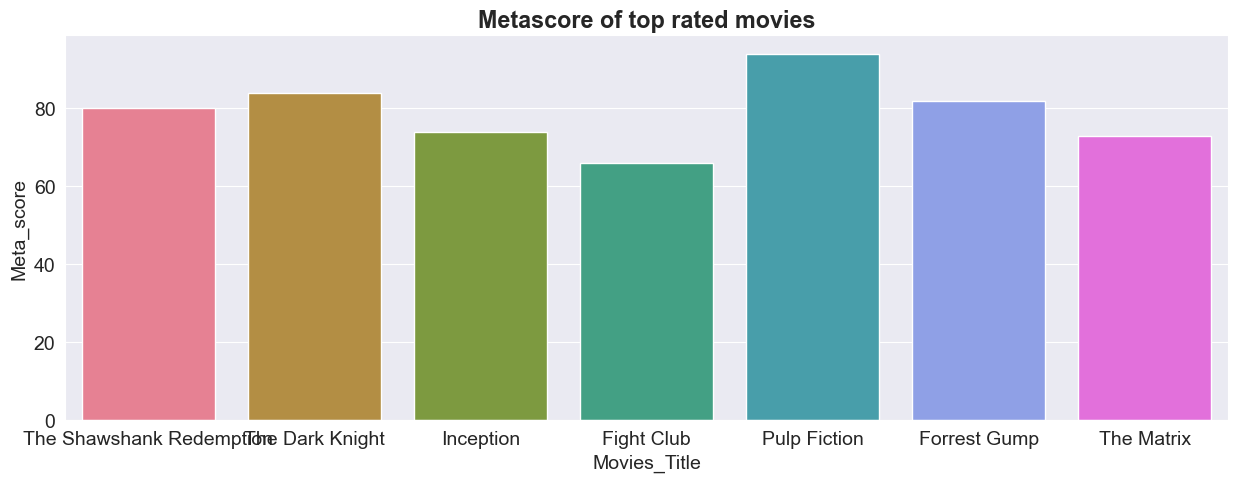

In [24]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['Meta_score'][:7], palette = 'husl')
g.set_title("Metascore of top rated movies", weight = "bold")
plt.show()

In [25]:
data['Gross'].head(5)

0     28341469
1    134966411
2    534858444
3     57300000
4      4360000
Name: Gross, dtype: int32

In [26]:
data.loc[data['Gross']==0]

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
18,https://m.media-amazon.com/images/M/MV5BNjViNW...,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90.00000,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,0
20,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020,U,153 min,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",77.97153,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,0
30,https://m.media-amazon.com/images/M/MV5BYjBmYT...,Seppuku,1962,U,133 min,"Action, Drama, Mystery",8.6,When a ronin requesting seppuku at a feudal lo...,85.00000,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,0
32,https://m.media-amazon.com/images/M/MV5BZjc4ND...,It's a Wonderful Life,1946,PG,130 min,"Drama, Family, Fantasy",8.6,An angel is sent from Heaven to help a despera...,89.00000,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,0
46,https://m.media-amazon.com/images/M/MV5BZmY2Nj...,Hotaru no haka,1988,U,89 min,"Animation, Drama, War",8.5,A young boy and his little sister struggle to ...,94.00000,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,https://m.media-amazon.com/images/M/MV5BYTE4YW...,Blowup,1966,A,111 min,"Drama, Mystery, Thriller",7.6,A fashion photographer unknowingly captures a ...,82.00000,Michelangelo Antonioni,David Hemmings,Vanessa Redgrave,Sarah Miles,John Castle,56513,0
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.00000,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,0
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.00000,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,0
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,U,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.00000,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,0


### Gross of top rated movies

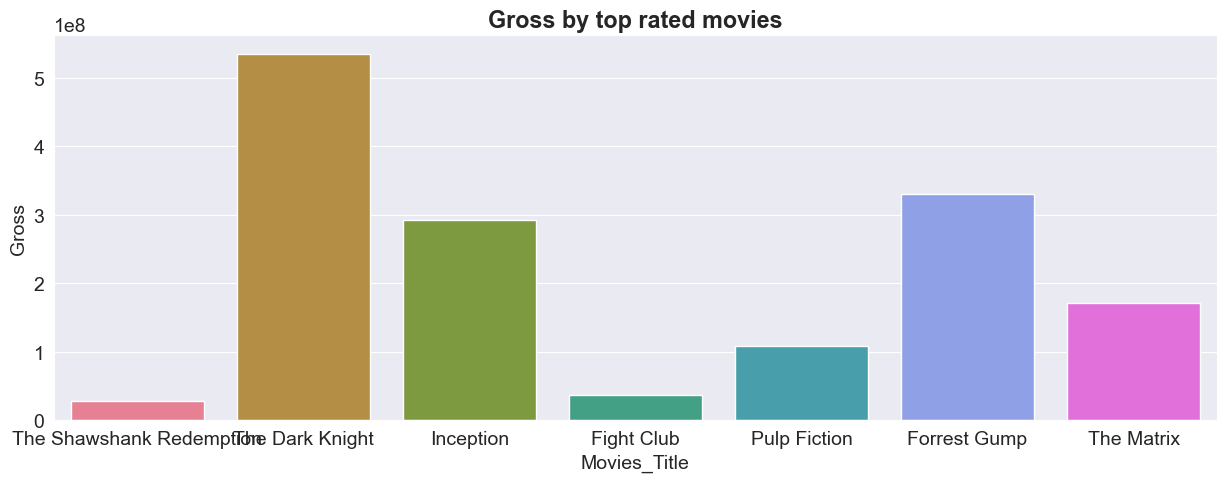

In [27]:
fig,axs=plt.subplots(figsize=(15,5))
g=sns.barplot(x=top_voted['Movies_Title'][:7],y=top_voted['Gross'][:7], palette = 'husl')
g.set_title("Gross by top rated movies", weight = "bold")
plt.show()

### Top movies by Gross

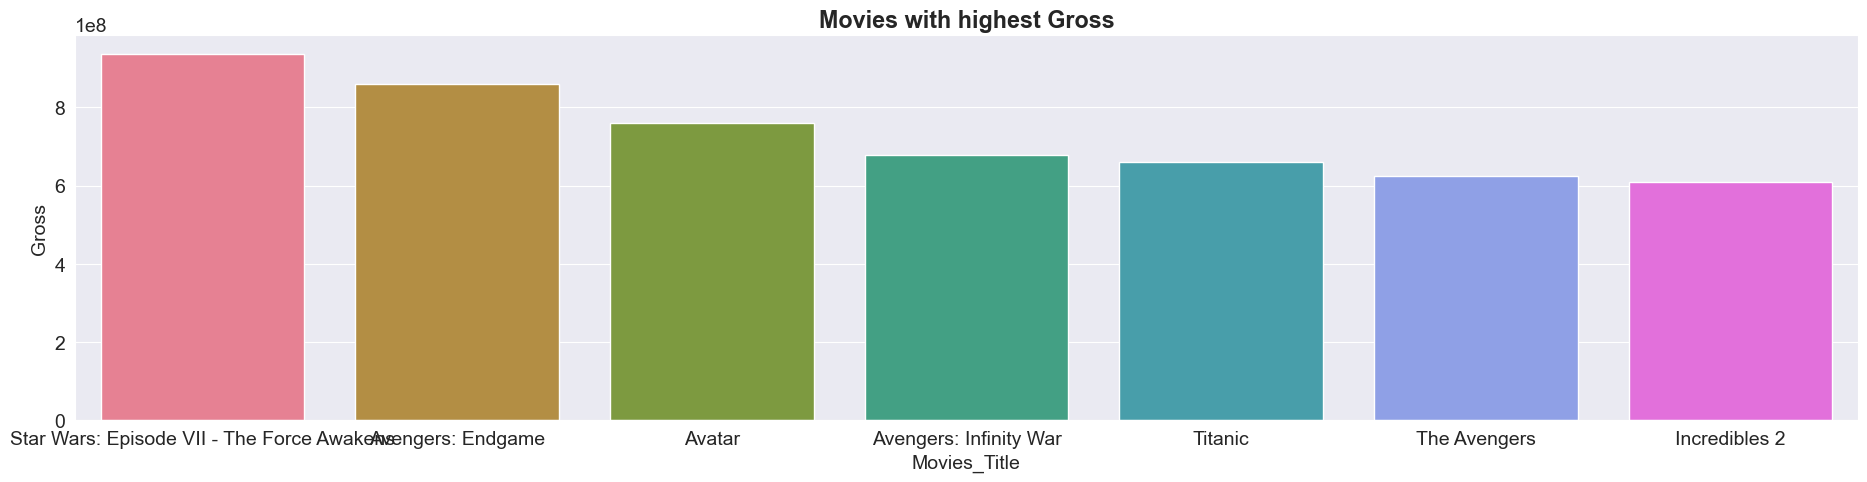

In [28]:
highest_earning = data.sort_values(['Gross'], ascending = False)
fig,axs=plt.subplots(figsize=(23,5))
g=sns.barplot(x=highest_earning['Movies_Title'][:7],y=highest_earning['Gross'][:7], palette = 'husl')
g.set_title("Movies with highest Gross", weight = "bold")
plt.show()

### Maximum movies released in

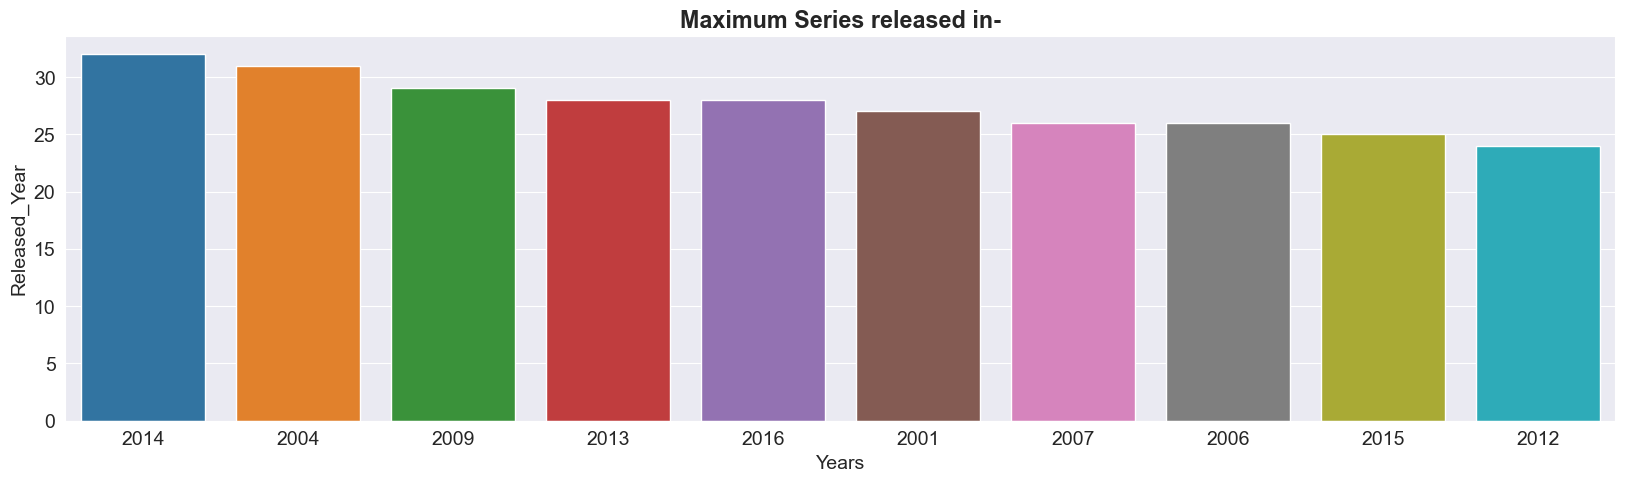

In [29]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=data['Released_Year'].value_counts()[:10].index,y=data['Released_Year'].value_counts()[:10])
g.set_title("Maximum Series released in-", weight = "bold")
g.set_xlabel("Years")
plt.show()

### Mostly occurred Directors

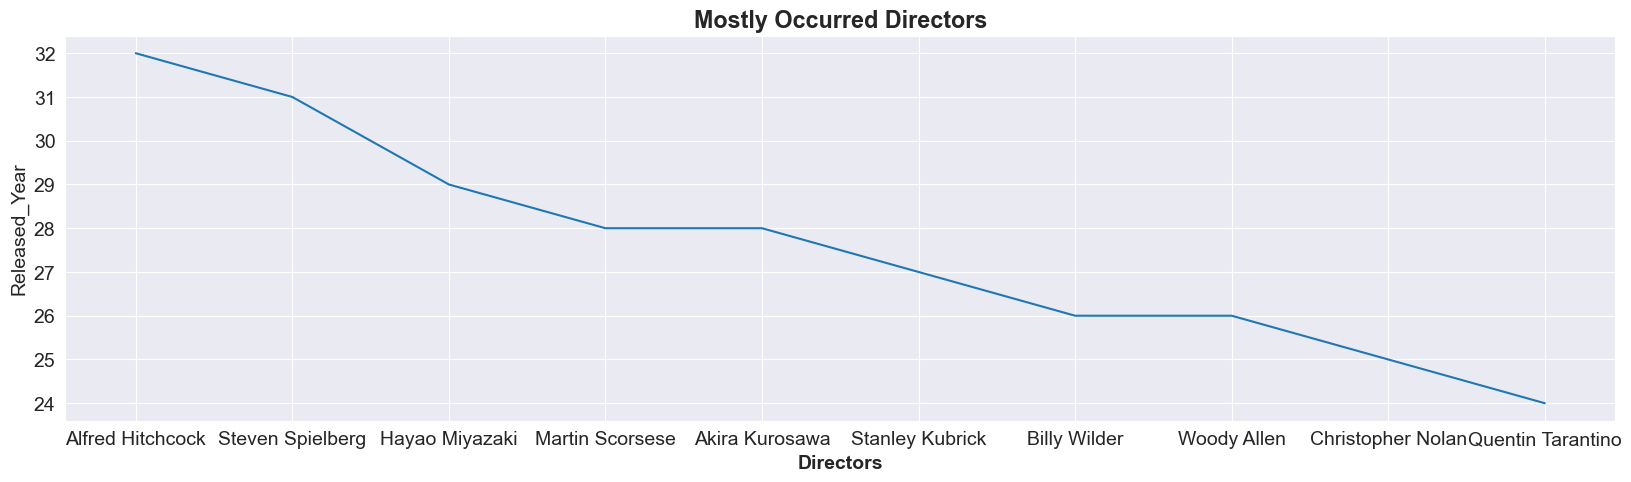

In [30]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.lineplot(x=data['Director'].value_counts()[:10].index,y=data['Released_Year'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

### Mostly occurred directors(barplot)

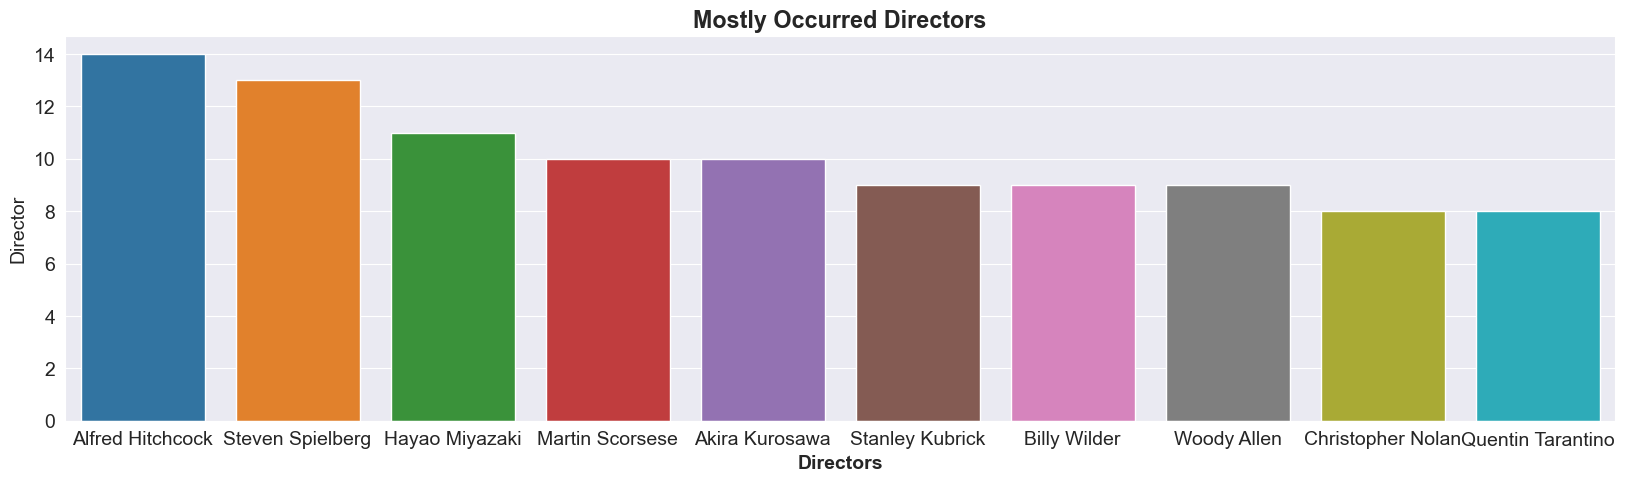

In [31]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=data['Director'].value_counts()[:10].index,y=data['Director'].value_counts()[:10])
g.set_title("Mostly Occurred Directors", weight = "bold")
g.set_xlabel("Directors", weight = "bold")
plt.show()

### Directors with respect to Gross of the movies

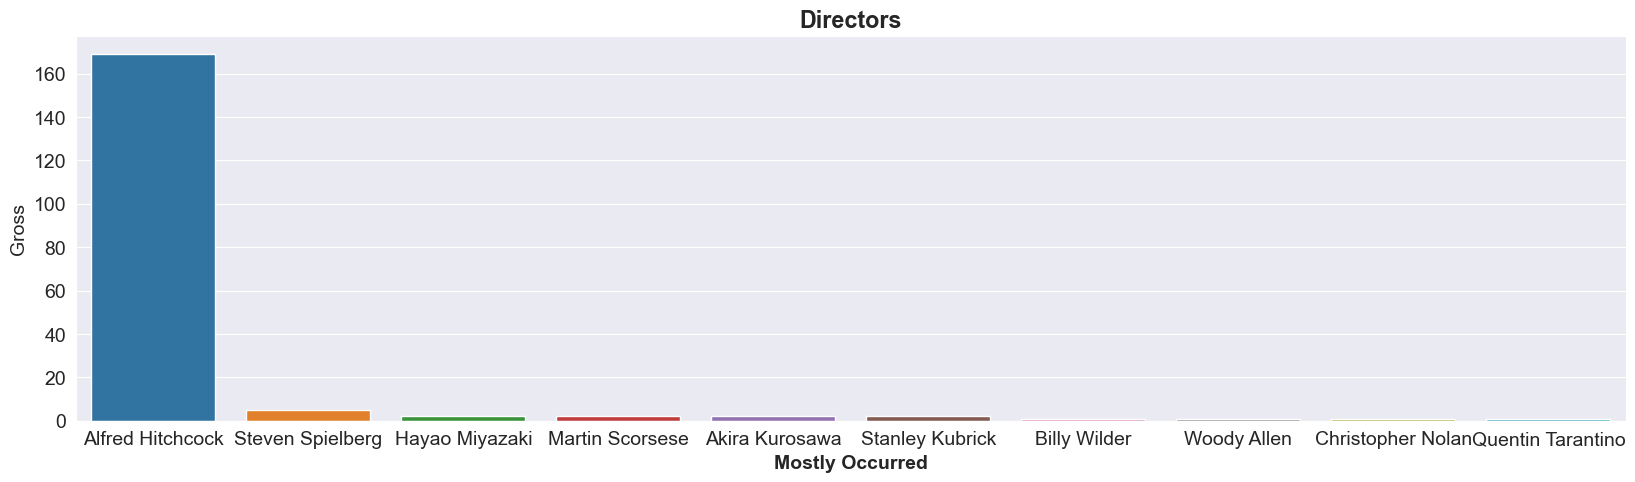

In [32]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.barplot(x=data['Director'].value_counts()[:10].index,y=data['Gross'].value_counts()[:10])
g.set_title("Directors", weight = "bold")
g.set_xlabel("Mostly Occurred", weight = "bold")
plt.show()

### Runtime of the movies

In [33]:
import re
duration=[]
for x in data["Runtime"]:
    p=re.compile('\d+')
    j=p.findall(x)
    if len(j)==2:
        duration.append(int(j[1])-int(j[0])+1)
    else:
        duration.append(int(j[0])+1)
data['duration']=duration

In [34]:
data['duration'].head()

0    143
1    176
2    153
3    203
4     97
Name: duration, dtype: int64

Text(0.5, 1.0, 'Time Duration of movies')

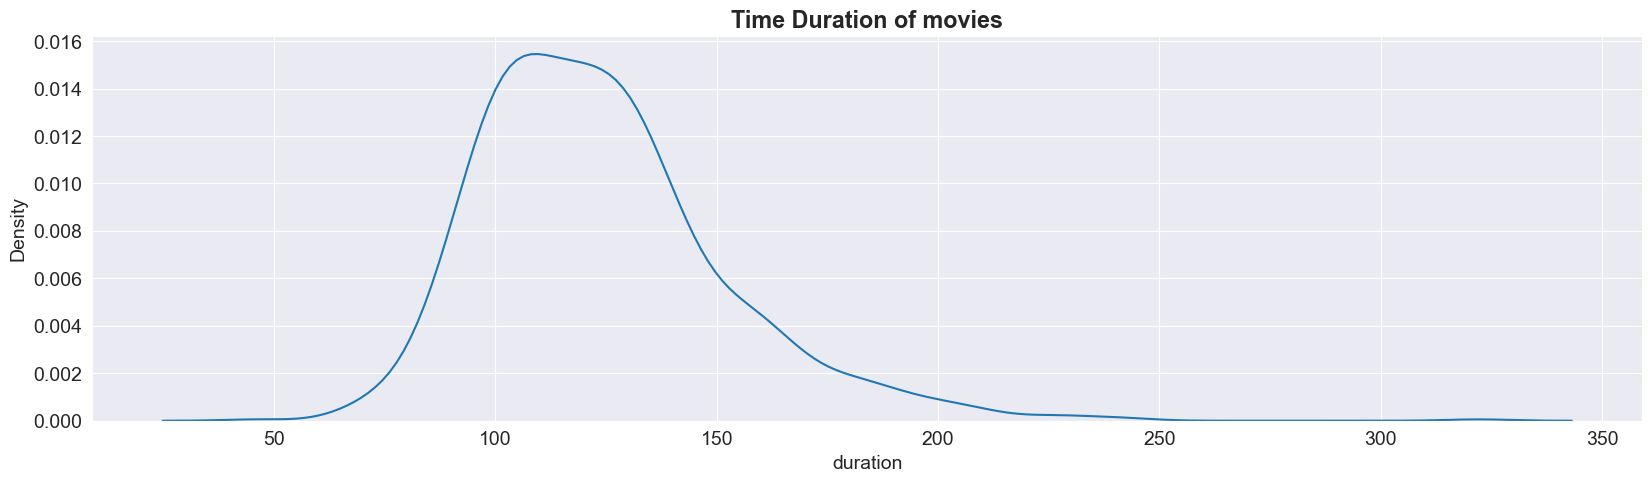

In [35]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.kdeplot(data['duration'])
g.set_title("Time Duration of movies", weight = "bold")

### Stars with most Occurences in movies

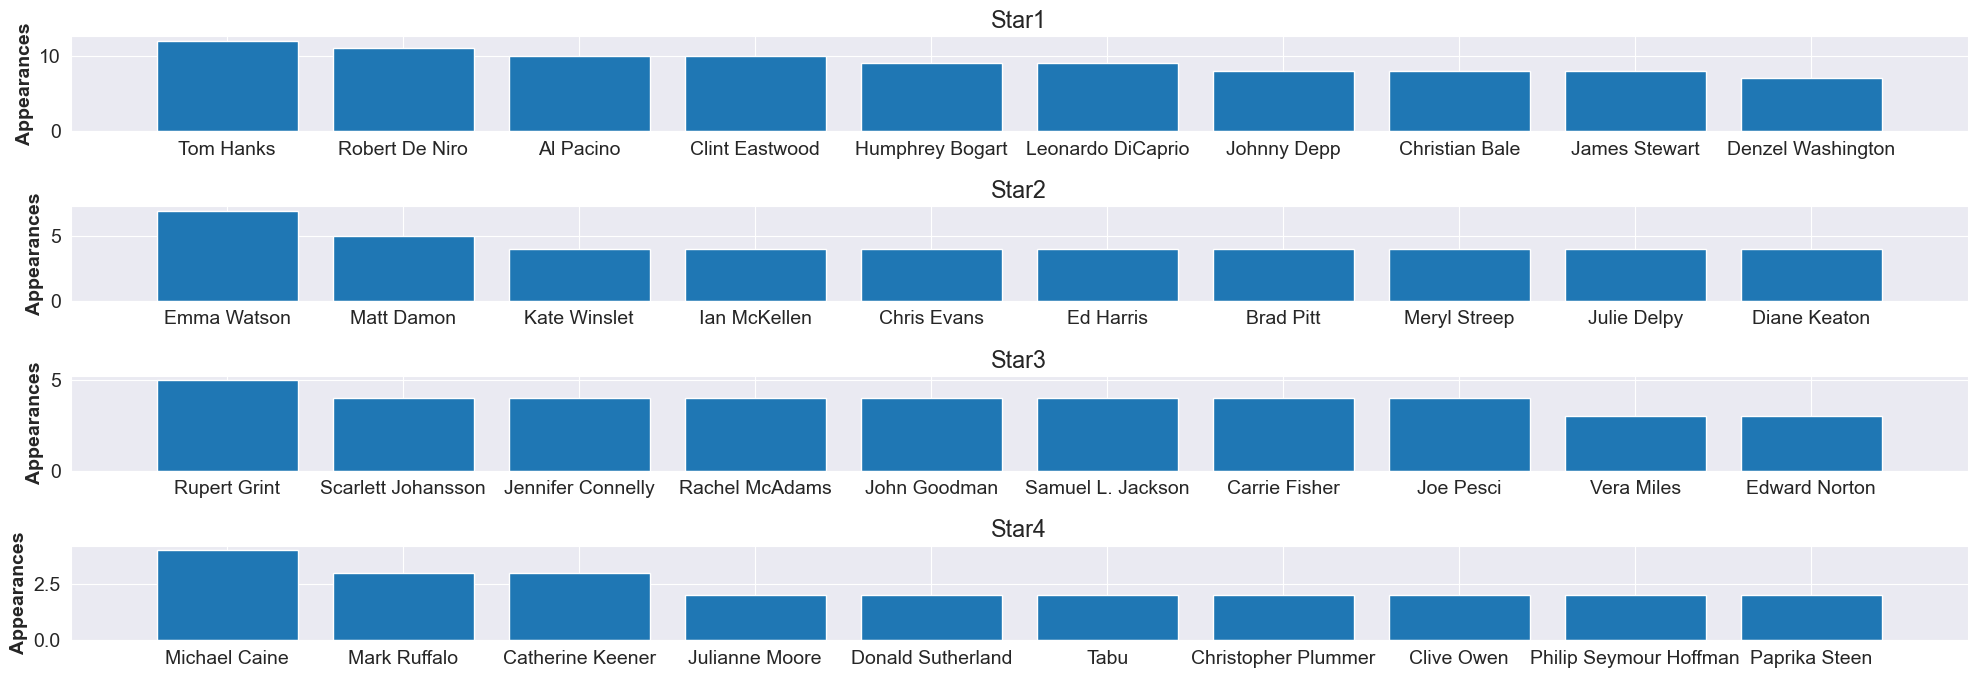

In [36]:
stars=['Star1','Star2','Star3','Star4']
fig,axs=plt.subplots(4,1,figsize=(20,7))
ax=0
for x in stars:
    axs[ax].bar(data[x].value_counts()[:10].index,data[x].value_counts()[:10])
    axs[ax].set_title(x)
    axs[ax].set_ylabel("Appearances", weight = "bold")
    ax+=1
    plt.tight_layout()

In [37]:
data['Certificate'].isnull().sum()

0

In [38]:
data['Certificate']=data['Certificate'].fillna('Not Rated')

certificates=data[data['Certificate']!='Not Rated']['Certificate']

### IMDB Rating Distribution

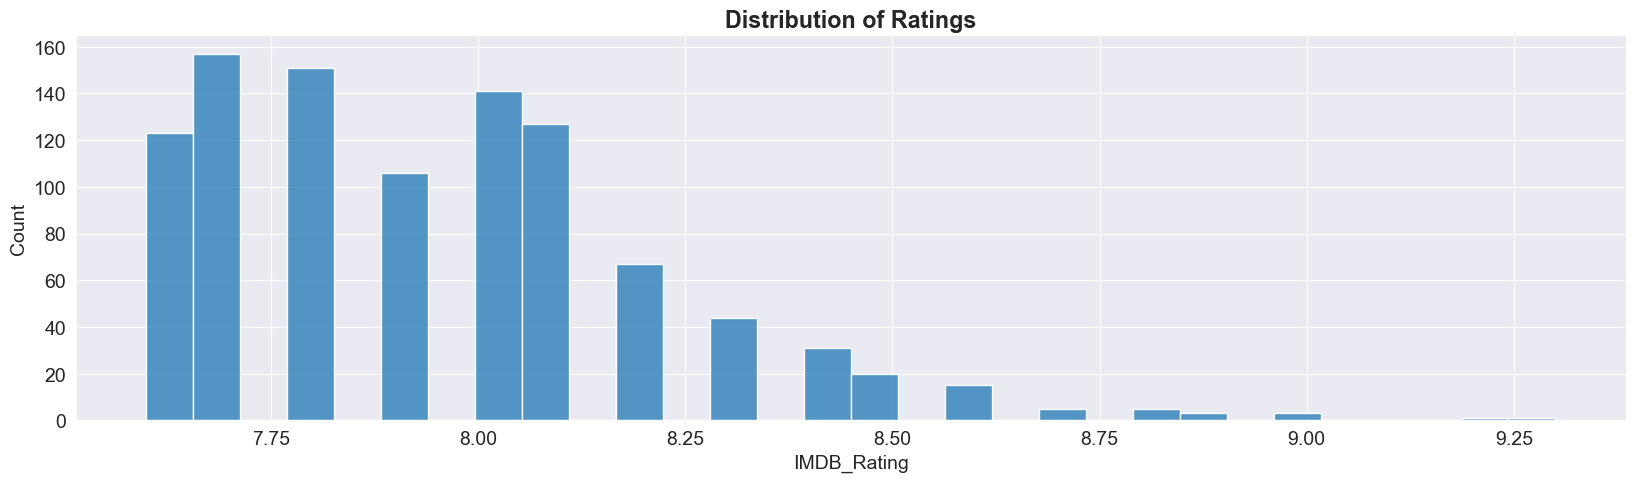

In [48]:
fig,axs=plt.subplots(figsize=(20,5))
g=sns.histplot(data['IMDB_Rating'],bins=30)
g.set_title("Distribution of Ratings", weight = "bold")
plt.show()

## Asking and Answering Questions

### Q: How many movies are there with mera score less then 50

In [40]:
data[data['Meta_score'] <= 50]['Movies_Title'].count()

22

### Q: Which director got highest number of votes on his movie

In [41]:
data.sort_values('No_of_Votes',ascending=False).head(1)['Director'][0]

'Frank Darabont'

### Q: Number of movies each director created

In [42]:
data.groupby('Director')['Movies_Title'].count().sort_values(ascending=False)

Director
Alfred Hitchcock    14
Steven Spielberg    13
Hayao Miyazaki      11
Martin Scorsese     10
Akira Kurosawa      10
                    ..
Jessie Nelson        1
Jeong-beom Lee       1
Jemaine Clement      1
Jeethu Joseph        1
Ömer Faruk Sorak     1
Name: Movies_Title, Length: 548, dtype: int64

### Q: Which certificate movie has highest IMDB ratings

In [43]:
data.groupby('Certificate')['IMDB_Rating'].sum().sort_values(ascending=False).index[0]

'U'

### Inferences and Conclusion
After analyzing this IMDB top 1000 movies we got to know about various information like which movie is top rated, which director released most movies, which movie earned most and much more